In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Proyecto primer parcial

En este proyecto exploraremos el **alineamiento de imágenes**. Dado un par de imágenes, buscamos una **transformación geométrica** que, aplicada a una de ellas, la alinee con la otra:

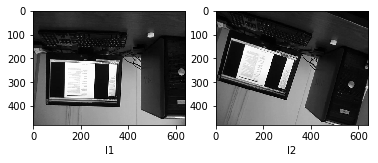

In [ ]:
im1 = cv2.imread("img2.bmp",0)
im2 = cv2.imread("img3.bmp",0)

plt.subplot(121)
plt.imshow(im1,cmap="gray")
plt.xlabel("I1")
plt.subplot(122)
plt.imshow(im2,cmap="gray")
plt.xlabel("I2")
plt.show()

Algunas transformaciones geométricas básicas son:

* Traslaciones.
* Rotaciones.
* Escalamientos.

Las cuales forman parte de un conjunto de transformaciones elementales llamadas **transformaciones afines**.

Las transformaciones afines pueden parametrizarse por medio de matrices de $2\times 3$.

Algunos ejemplos se muestran en las siguientes celdas.




# Traslación

Esta transformación permite mover un punto (pixel) con coordenadas en $\begin{bmatrix} r \\ c \end{bmatrix}$ a la posición $\begin{bmatrix} r + a\\ c + b\end{bmatrix}$, siendo $[a, b]$ el vector de traslación.

La traslación está determinada por la siguiente matriz:

$$
M_T = \begin{bmatrix}
        1 & 0 & a \\
        0 & 1 & b \\
      \end{bmatrix}  
$$

Observa que si multiplicamos la matriz por el vector de coordenadas aumentado $\begin{bmatrix} r \\ c \\ 1\end{bmatrix}$ obtenemos las coordenadas transformadas:

$$\begin{bmatrix} r + a\\ c +b\end{bmatrix} = M_T \begin{bmatrix} r \\ c \\ 1\end{bmatrix}$$


Podemos applicarla mediante OpenCV como se muestra en la siguiente celda.

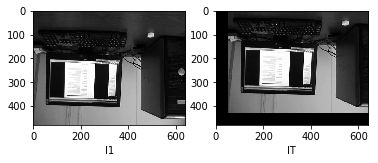

In [ ]:
T = np.float32([[1, 0, 50], [0, 1, -50]])

(rens, cols) = im1.shape

im1_t = cv2.warpAffine(im1, T, (cols, rens))

plt.subplot(121)
plt.imshow(im1,cmap="gray")
plt.xlabel("I1")
plt.subplot(122)
plt.imshow(im1_t,cmap="gray")
plt.xlabel("IT")
plt.show()


# Rotación

Una rotación, por un ángulo $\theta$, está determinada por la siguiente matriz:

$$
M_T = \begin{bmatrix}
        \cos{\theta} & -\sin{\theta} & 0 \\
        \sin{\theta} & \cos{\theta} & 0 \\
      \end{bmatrix}  
$$

El ángulo $\theta$ debe estar en radianes.


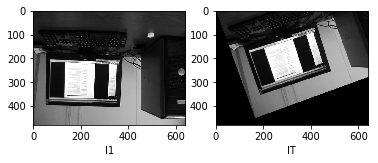

In [ ]:
th = -20*np.pi/180

T = np.float32([[np.cos(th), -np.sin(th), 0], [np.sin(th), np.cos(th), 0]])

im1_t = cv2.warpAffine(im1, T, (cols, rens))

plt.subplot(121)
plt.imshow(im1,cmap="gray")
plt.xlabel("I1")
plt.subplot(122)
plt.imshow(im1_t,cmap="gray")
plt.xlabel("IT")
plt.show()

# Transformación compuesta

Podemos combinar una traslación y una rotación en una misma matriz:

$$
M_T = \begin{bmatrix}
        \cos{\theta} & -\sin{\theta} & a \\
        \sin{\theta} & \cos{\theta} & b \\
      \end{bmatrix}  
$$


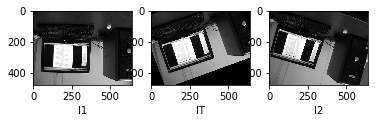

In [ ]:
th = -20*np.pi/180
a = -70
b = 50

T = np.float32([[np.cos(th), -np.sin(th), a], [np.sin(th), np.cos(th), b]])

im1_t = cv2.warpAffine(im1, T, (cols, rens))

plt.subplot(131)
plt.imshow(im1,cmap="gray")
plt.xlabel("I1")
plt.subplot(132)
plt.imshow(im1_t,cmap="gray")
plt.xlabel("IT")
plt.subplot(133)
plt.imshow(im2,cmap="gray")
plt.xlabel("I2")


plt.show()

# Alineamiento (registro) de imágenes

El alineamiento de imágenes es un problema con aplicaciones muy importantes en el procesamiento de imágenes médicas o satelitales y en la navegación robótica.

Dadas dos imágenes, $I_1$, $I_2$, buscamos una transformación geométrica que aplicada a una de ellas la alinee a la otra:

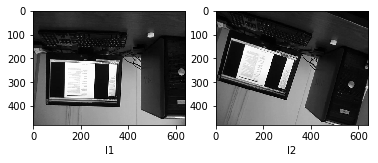

In [ ]:
plt.subplot(121)
plt.imshow(im1,cmap="gray")
plt.xlabel("I1")
plt.subplot(122)
plt.imshow(im2,cmap="gray")
plt.xlabel("I2")
plt.show()

In [ ]:
rens*cols

307200

Para este proyecto, suponemos que la transformación geométrica es la composición de una traslación y una rotación, por lo que debemos determinar el valor de tres parámetros: $\theta$, $a$ y $b$.

Para estimarlos, podemos minimizar la siguiente función:

\begin{align}
E(\theta,a, b) &= \sum_i(I_T[r_i, c_i]-I_2[r_i, c_i])^2\\
&= \sum_i(I_1[r_i\cos{\theta}-c_i\sin{\theta}+a, r_i\sin{\theta}+c_i\cos{\theta}+b]-I_2[r_i, c_i])^2\end{align}

La sumatoria puede recorrer un conjunto seleccionado de muestras de los pixeles de la imagen $I_2$. **No es necesario construir la imagen** $I_T$.

### Interpolación

Para evaluar los valores de intensidad de la imagen $I_T$ podemos usar interpolación al vecino más cercano. Supón, por ejemplo, que $[r_i, c_i] = [100, 125]$ (coordenadas de un pixel en la imagen $I_2$ ) y que los parámetros de la transformación actual son $\theta = 0.1$, $a=-2.3$ y $b = 5.4$. El pixel transformado tiene las coordenadas:

\begin{align}
    r_i' &= r_i\cos{\theta}-c_i\sin{\theta}+a\\
         &= 100\cos{0.1}-125\sin{0.1}-2.3\\
         &= 84.72\\
\end{align}

\begin{align}
    c_i' &= r_i\sin{\theta}+c_i\cos{\theta}+b\\
         &= 100\sin{0.1}+125\cos{0.1}+5.4\\
         &= 139.76\\
\end{align}

$$[100, 125] \rightarrow [84.72, 139.76]$$

Evaluamos la intensidad, redondeando las coordenadas a $[85, 140]$ y leyendo $I_1[85, 140]$


In [ ]:
rt = 100*np.cos(0.1)-125*np.sin(0.1)-2.3
ct = 100*np.sin(0.1)+125*np.cos(0.1)+5.4

rt = int(round(rt))
ct = int(round(ct))

im1[rt, ct]

3

In [ ]:
im2[100, 125]

34

Observa que con esa estrategia podemos construir la imagen transformada completa.

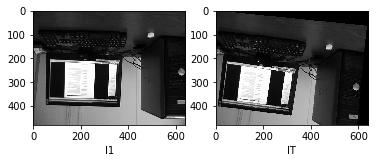

In [ ]:
(ren, col) = im1.shape

im1_t = np.zeros((ren, col))

for r in range(ren):
    for c in range(col):

        rt = r*np.cos(0.1)-c*np.sin(0.1)-2.3
        ct = r*np.sin(0.1)+c*np.cos(0.1)+5.4

        rt = int(round(rt))
        ct = int(round(ct))

        if rt >= 0 and rt < ren and ct >= 0 and ct < col:
            im1_t[r, c] = rt = im1[rt, ct]

plt.subplot(121)
plt.imshow(im1,cmap="gray")
plt.xlabel("I1")
plt.subplot(122)
plt.imshow(im1_t,cmap="gray")
plt.xlabel("IT")
plt.show()

Compara con lo que se obtiene con OpenCV

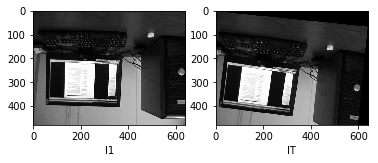

In [ ]:
th = 0.1
a = -2.3
b = 5.4

T = np.float32([[np.cos(th), -np.sin(th), a], [np.sin(th), np.cos(th), b]])

(rens, cols) = im1.shape

im1_t = cv2.warpAffine(im1, T, (cols, rens))

plt.subplot(121)
plt.imshow(im1,cmap="gray")
plt.xlabel("I1")
plt.subplot(122)
plt.imshow(im1_t,cmap="gray")
plt.xlabel("IT")
plt.show()